 ## Régression linéaire simple

### Problématique



##### Quelle est la relation entre la production d'une économie et son Produit Intérieur Brut (BIP), et comment les variations de la production influencent-elles la santé économique d'un pays ?

#### Étape 1 : Préparation des Données

Importez les bibliothèques nécessaires

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

#### Étape 2 : Chargement de jeu de données 

In [18]:
data = pd.read_csv('dataset_fin.csv')

In [19]:
data.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


#### Étape 3: Sélection des variables

1-Définir les variables 'Production' et 'GDP' comme variables indépendante (X) et dépendante (y).

In [22]:
# define le variable independant  x
X = data['Production']
# define le variable dependant  y
y = data['GDP']
# ajouter un colonne contient des '1' (y=ax+1*b)
X = sm.add_constant(X)

#### Étape 4 : Nuage de points

1-Un nuage de points est créé pour visualiser la relation entre la production et le Produit Intérieur Brut  (PIB).

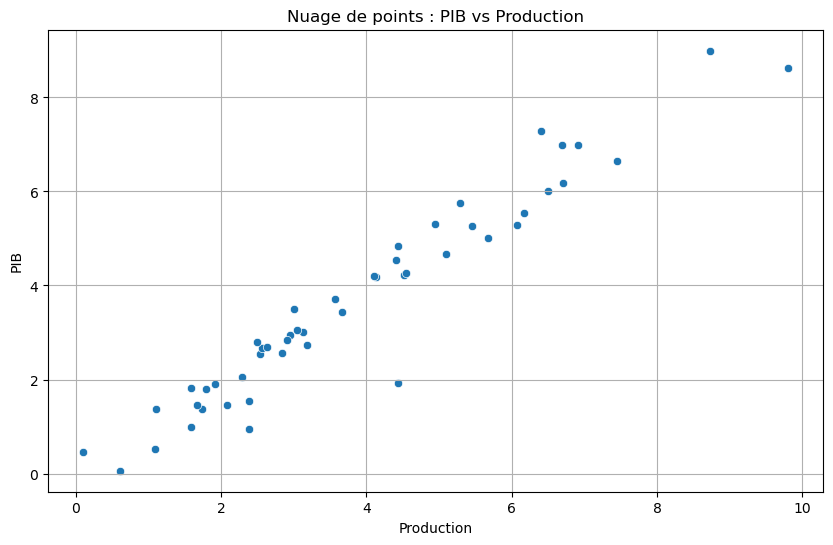

In [25]:
# Creer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production', y='GDP', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : PIB vs Production')
plt.xlabel('Production')
plt.ylabel('PIB')
plt.grid(True)

# Afficher le graphique
plt.show()


 **Intérprétation**
 
 le graphique révèle une corrélation positive entre la production et le PIB,indiquant qu'à mesure que la production augmente, le PIB tend également à augmenter.

#### Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [29]:
# creation d'un modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

#### Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre Advertisements et les Sales.

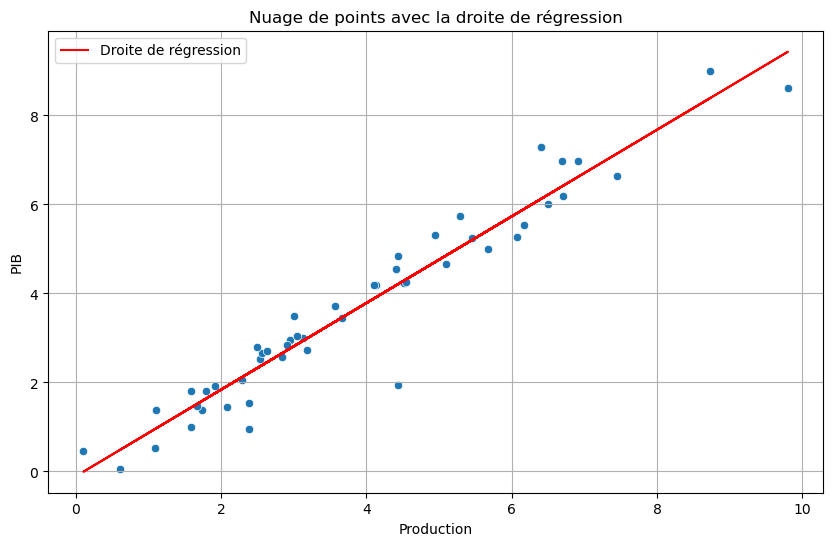

In [1485]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production', y='GDP', data=data)
plt.plot(data['Production'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('Production')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()



**Intérprétation**

 -L'ajout d'une droite de régression au nuage de points permet de visualiser la relation linéaire entre la production et le PIB en indiquant une tendance générale où une augmentation de la production est associée à une hausse du PIB..

-La droite de régression représente la meilleure approximation linéaire des données, en minimisant la distance entre les points et la droite.


#### Étape 6 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

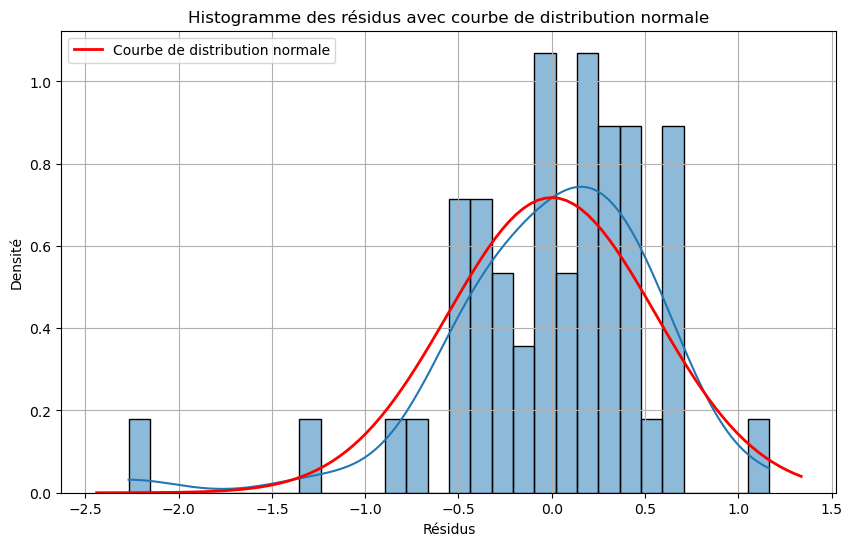

In [1491]:
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

**Intérprétation** 

On remarque que:

Histogramme des résidus montre la répartition des résidus (erreurs) de la régression, indiquant leur fréquence sur l'axe vertical.

 La majorité des résidus se situent près de zéro, ce qui est souhaitable pour une bonne modélisation.

En résumé le graphique indique que les résidus de la régression se distribuent de manière relativement normale.Autrement dit que les résidus suivent une distribution normale.

#### Étape 7 : Application des Tests 

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
    

  #####  1-Le test de Durbin-Watson 

Objectif du test : Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus d'une régression.

In [1500]:
# Test de Durbin-Watson (INDÉPENDANCE DES ERREURS ) 
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')



Test de Durbin-Watson: 2.018619483378296


**Intérprétation**

La valeur de La statistique de Durbin-Watson  : 2.2016 indique que les résidus ne présentent pas d'autocorrélation significative,Cela signifie que les résidus sont indépendants les uns des autres.

En Résumé le modèle est capable de prédire comment les variations de production influencent la santé économique d'un pays sans être biaisé par des erreurs systématiques.

##### 2-Le test de White 
   

Objectif : Le test de White vérifie l'homoscédasticité des résidus d'un modèle de régression.

In [1506]:
# Test de White pour (L’HOMOSCÉDASTICITÉ )
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))



{'LM statistic': 0.8308739326922673, 'p-value': 0.6600517972586873, 'f-statistic': 0.39672923326902776, 'f p-value': 0.6747949128414077}


**Intérprétation**


-La p-value est bien supérieure à 0.05 ,Cela renforce l'idée qu'il n'y a pas d'hétéroscédasticité dans le modèle, indiquant aussi que la variance des résidus est constante à travers les observations.

-L'absence d'hétéroscédasticité garantit que les erreurs de prévision ne varient pas en fonction des niveaux de production ou de BIP, ce qui renforce la robustesse des résultats du modèle.


####  Étape 8: Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [1512]:
#code ici
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     656.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           2.87e-29
Time:                        13:29:53   Log-Likelihood:                -40.758
No. Observations:                  49   AIC:                             85.52
Df Residuals:                      47   BIC:                             89.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.168     -0.666      0.5

**Intérprétation**


On remarque que l'équation de régression linéaire pour ce modèle est :
##### GDP = -0.1117  +  0.9739 *Production

##### a = -0.1117 
-Cela signifie que lorsque la production est nulle, le GDP est estimé à -0.1117, mais cette estimation n'est pas significative. 

##### b =  0.9739 
-Cela indique que pour chaque unité d'augmentation de la production, le GDP augmente en moyenne de 0.9739 unités

**R-squared**: 0.9775
Cela indique que 97,75 % de la variance de la variable dépendante (GDP) est expliquée par le modèle. C'est un bon ajustement.

**Statistique F : 656.8**
Une statistique F élevée indique que le modèle dans son ensemble est significatif. Cela signifie que les variables explicatives (ici, la production) ont un impact significatif sur le PIB.


####  Étape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

Objectif:Le MSE mesure la moyenne des carrés des erreurs entre les valeurs prédites par le modèle et les valeurs réelles. En d'autres termes, il quantifie la qualité des prédictions du modèle.

In [1520]:
from sklearn.metrics import mean_squared_error

# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')


Erreur Quadratique Moyenne (MSE): 0.3090426201614559


**Intérprétation**


Dans le contexte de la relation entre la production et le PIB, une MSE de 0.3094 signifie que les prédictions du modèle sont relativement proches des valeurs réelles.


#### Étape 10 : Coefficient de détermination (R²).

Objectif:Le R² mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle

In [1526]:
# Coefficient de détermination (R²)
r_squared = model.rsquared
print(f'Coefficient de détermination (R²): {r_squared}')


Coefficient de détermination (R²): 0.9332165736517442


**Intérprétation**

Un R² proche de 1 signifie que le modèle s'ajuste très bien aux données. 

-Dans ce cas 0.9332 indique que 93.32% de la variance du PIB est expliquée par la production.Suggèrant aussi que le modèle est capable de prédire la variable dépendante (PIB) en fonction de la production avec une grande précision.

#### Conclusion


En résumé,à travers la regression linéaire on a montrer bien l'exsistance d'une relation directe et positive entre la production et le PIB. Une production plus élevée conduit à un PIB plus élevé.